In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv("/content/Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Count'>

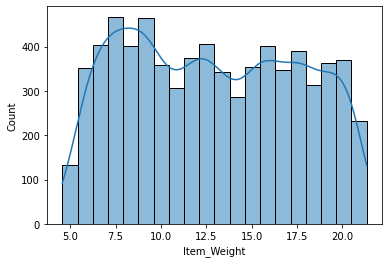

In [ ]:
sns.histplot(data=data,x='Item_Weight',kde=True)

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

<Axes: xlabel='Item_Weight', ylabel='Count'>

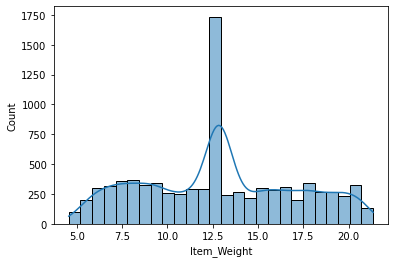

In [ ]:
sns.histplot(data=data,x='Item_Weight',kde=True)

<Axes: xlabel='Outlet_Size', ylabel='Count'>

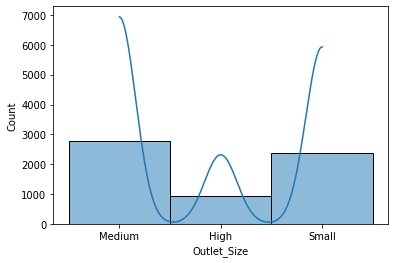

In [ ]:
sns.histplot(data=data,x='Outlet_Size',kde=True)

In [ ]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

<Axes: xlabel='Outlet_Size', ylabel='Count'>

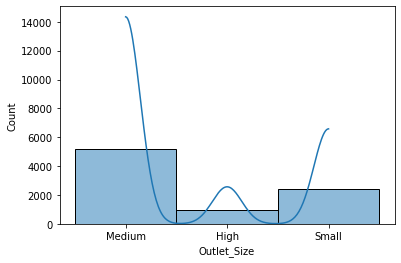

In [ ]:
sns.histplot(data=data,x='Outlet_Size',kde=True)

In [ ]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


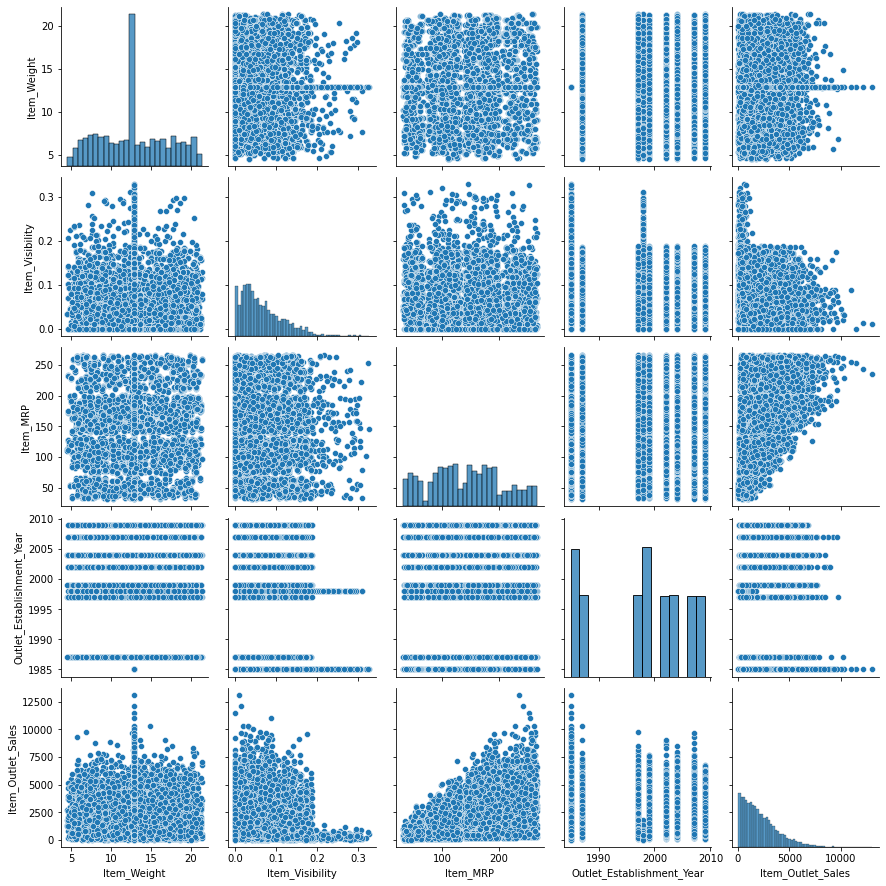

In [ ]:
sns.pairplot(data=data)

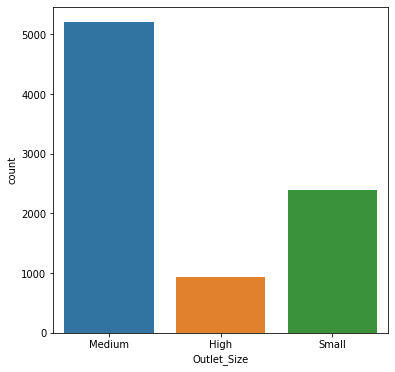

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

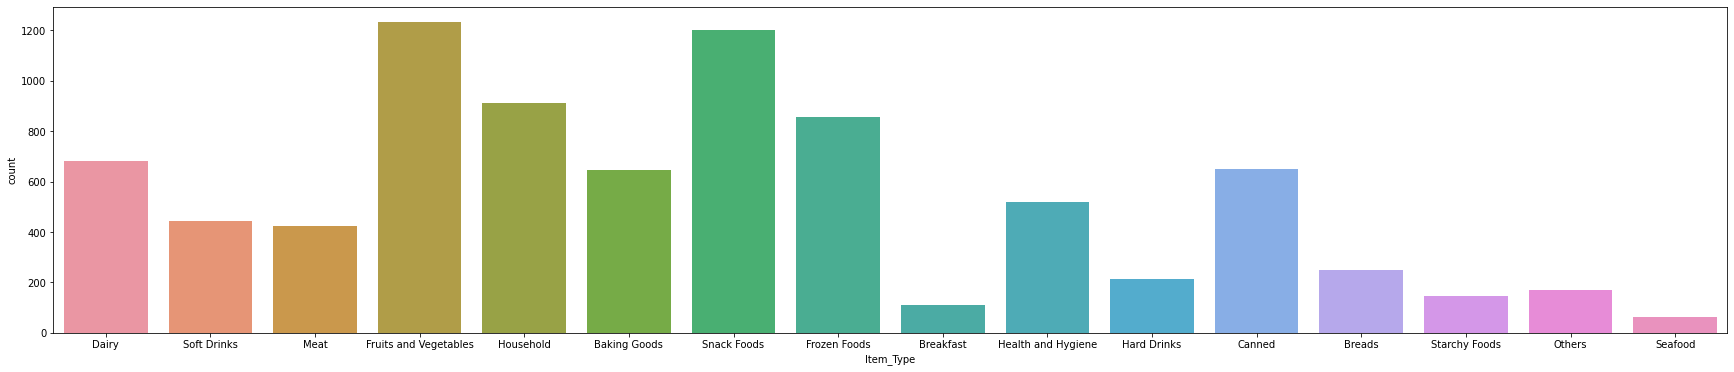

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

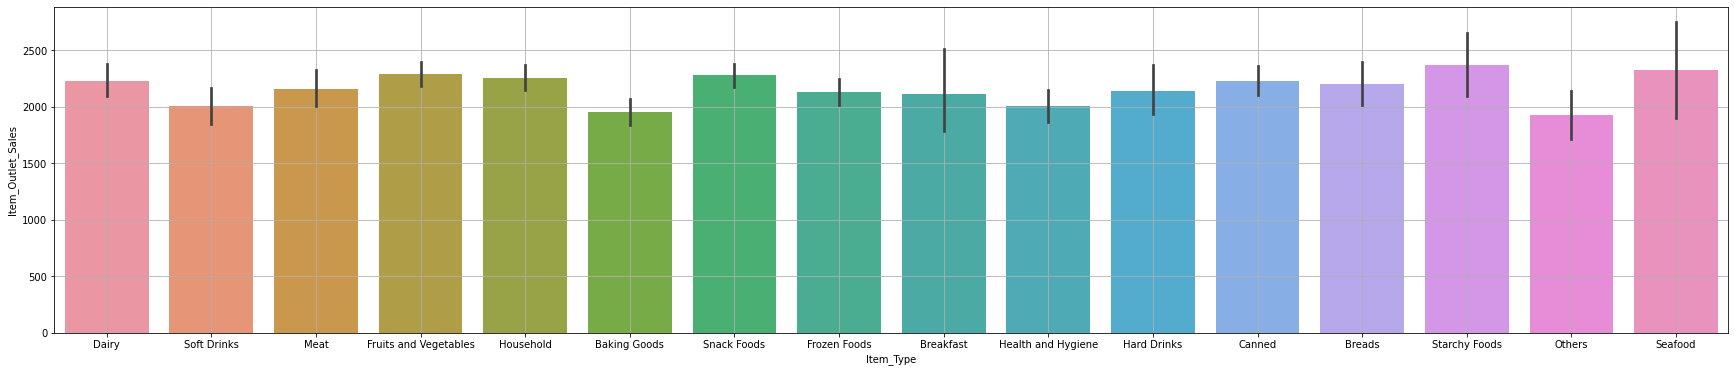

In [ ]:
plt.figure(figsize=(30,6))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data)
plt.grid()

In [ ]:
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<Axes: >

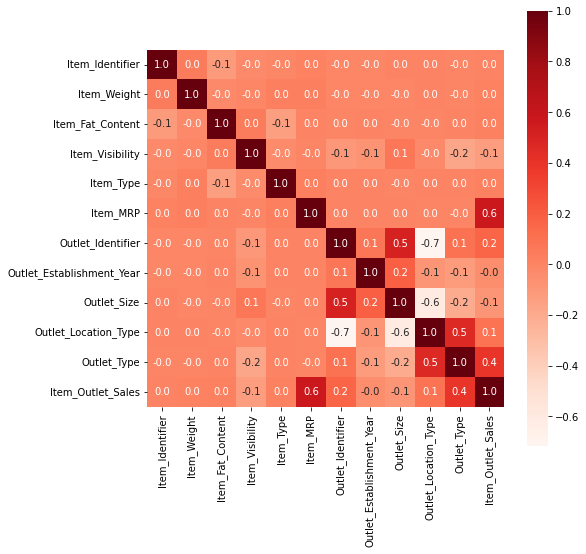

In [ ]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

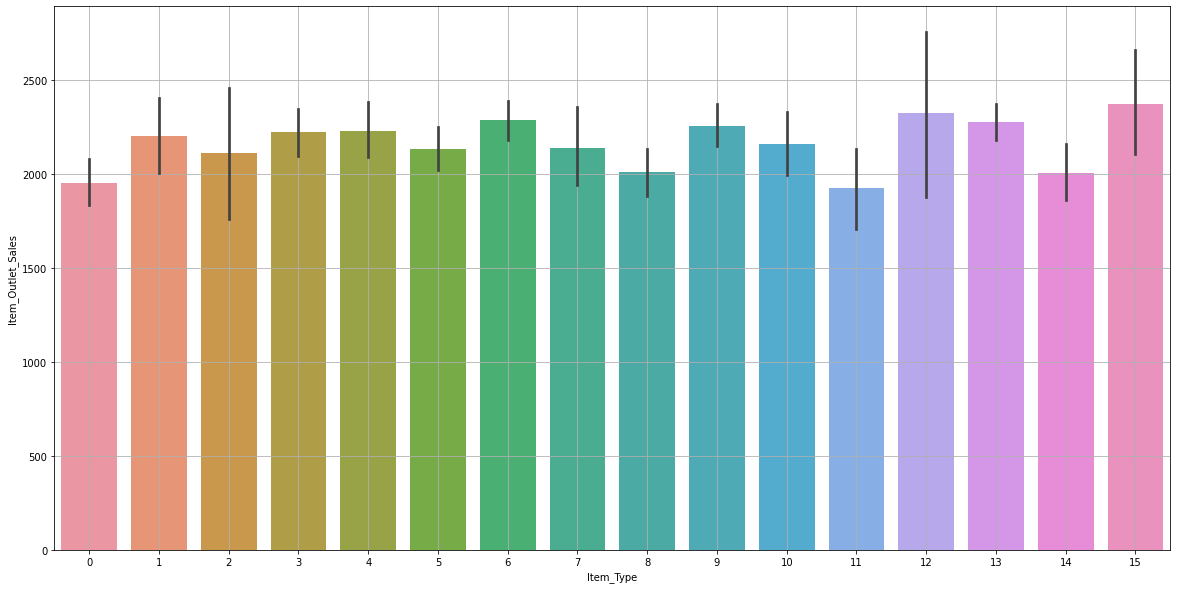

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data)
plt.grid()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

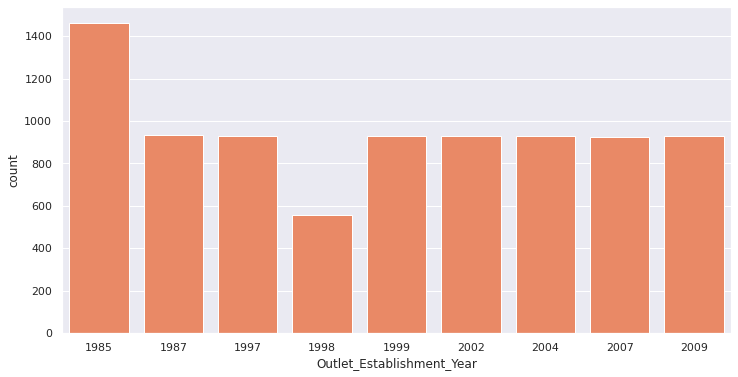

In [ ]:

sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=data, color='coral')

**Bivariate Analysis**

We find the dependent and independent variables in the dataset.

In [ ]:
data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


Text(0.5, 1.0, 'Relation b/w Item Weight & its Sales at Outlets')

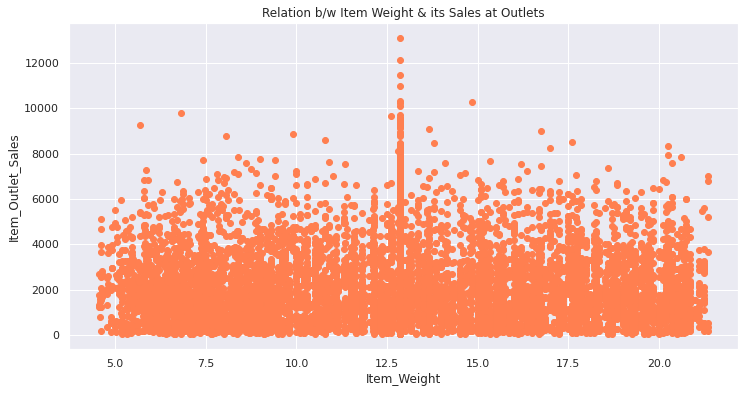

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(data.Item_Weight,data.Item_Outlet_Sales, color='Coral')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relation b/w Item Weight & its Sales at Outlets')

There is strong relationship b/w these two columns

Text(0.5, 1.0, 'Relationship b/w Item Visibility & Sales at outlets')

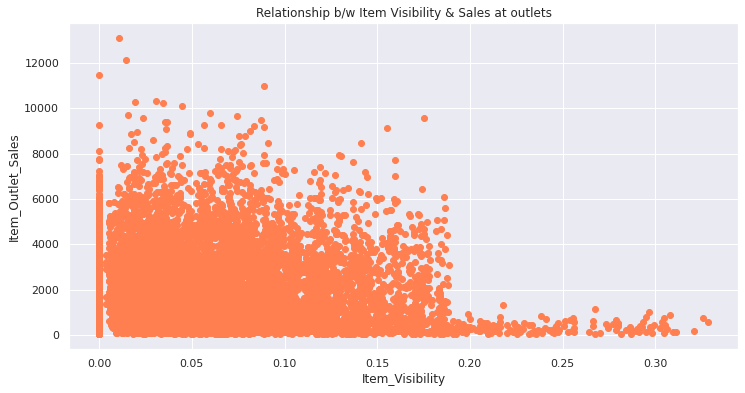

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(data.Item_Visibility,data.Item_Outlet_Sales, color='Coral')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Visibility & Sales at outlets')

In [ ]:
# We need to split the data
X = data.drop(columns='Item_Outlet_Sales',axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = data['Item_Outlet_Sales'] # Target

# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.


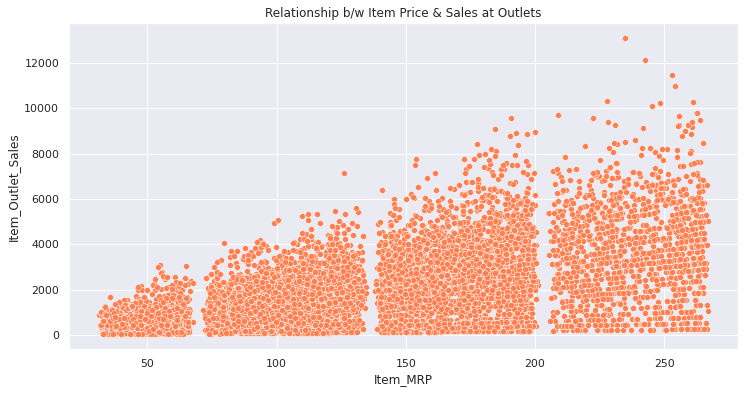

In [ ]:
# Create the figure
sns.scatterplot(x=data["Item_MRP"], y=data["Item_Outlet_Sales"], color='coral')

# Add labels and title
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Price & Sales at Outlets')

# Show the plot
plt.show()

XG BOOST MODEL

In [ ]:
model1 = XGBRegressor()

# Now we need to train the model
model1.fit(X_train,y_train) # fitting means training

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
train_pred1 = model1.predict(X_train)
train_pred1

array([2172.693 , 2844.0671, 3308.6353, ..., 3363.3127, 1717.4066,
       2013.252 ], dtype=float32)

In [ ]:
test_pred1 = model1.predict(X_test)
test_pred1

array([2098.7969, 4360.376 , 1454.3608, ..., 2883.5608, 1158.3351,
       3164.4902], dtype=float32)

In [ ]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_train,train_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 

R squared error for XGB Regressor: 0.8549833167058186


In [ ]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_test,test_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 

R squared error for XGB Regressor: 0.5191234777241828


Linear Regression model

In [ ]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
train_pred2 = model2.predict(X_train)
train_pred2

array([2327.41867944, 3031.89278067, 3867.31973582, ..., 2567.89841379,
       2376.92087115, 3052.32198326])

In [ ]:
test_pred2 = model2.predict(X_test)
test_pred2

array([2521.30878303, 3777.79279852, 1314.26315325, ..., 2255.36856828,
       4513.18525798, 3595.71438136])

In [ ]:
model2.score(X_test,y_test)

0.49498230467978976

In [ ]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_train,train_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.514058329918831


In [ ]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_test,test_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.49498230467978976


**Regularized Linear Regression**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model2.predict(X_test)
print("Accuracy by mean squared error:",  mean_squared_error(y_test, predictions))

Accuracy by mean squared error: 1559027.3555603335


In [ ]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=1.0)
reg2.fit(X_train, y_train)

predications = reg2.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 1559269.9027869445


In [ ]:
reg2.score(X_test,y_test)

0.49490373605111726

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

predications = lasso.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 1559183.3342715115


In [ ]:
from sklearn.linear_model import ElasticNet
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(X_train, y_train)
predications = reg_e.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 1575864.095176496


In [ ]:
# Lasso Regression
LS=Lasso(alpha=0.05)
LS.fit(X_train,y_train)

Lasso(alpha=0.05)

In [ ]:
LS.score(X_test,y_test)

0.49495737854634225

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(X_train,y_train)


GradientBoostingRegressor()

In [ ]:
grad.score(X_test, y_test)

0.5864185042624145

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
ran.score(X_test, y_test)

0.5437231908094637

In [ ]:
##hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.557 using {'n_estimators': 1000}
0.518 (0.005) with: {'n_estimators': 10}
0.556 (0.003) with: {'n_estimators': 100}
0.557 (0.004) with: {'n_estimators': 1000}


Conclusion:

Fruits and Vegetables is the most selling Item_Type

Low Fat is the Highest Itrm_Fat_Content

Supermarket Type 1 has the most sales

Strong R/s B/w Item_Weight and Item_Outlet_Sales

Linear Regression score : 49.498

XGB Regressor Score     : 58.7 

Lasso Regression score : 49.495

ridge Regression score : 49.490

GradientBoostingRegressor score : 58.6

RandomForestRegressor accuracy : 54.8

So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> data preprocessing -> exploratory data analysis -> split data -> train model -> check its accuracy -> improve model or try other ones.

Best suitable model is XGB.

In [ ]:
model1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,627,11.800000,1,0.057422,10,149.9366,8,1997,2,0,1
3315,996,12.857645,0,0.000000,0,100.1384,5,1985,1,2,3
5932,1127,7.725000,0,0.047783,3,249.1092,8,1997,2,0,1
7872,439,10.500000,0,0.052555,5,89.6830,8,1997,2,0,1
5946,993,12.857645,1,0.235859,13,46.1402,4,1985,2,0,0


In [ ]:
y_train.head()

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 7173 to 7336
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   int64  
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   int64  
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   int64  
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   int64  
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   int64  
 9   Outlet_Location_Type       6818 non-null   int64  
 10  Outlet_Type                6818 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 639.2 KB


In [ ]:
test_data=[[627,11.800000,1,0.057422,10,149.9366,8,1997,2,0,1]]

In [ ]:
import pandas as pd


# Define the column names and data types
columns = [
    'Item_Identifier',
    'Item_Weight',
    'Item_Fat_Content',
    'Item_Visibility',
    'Item_Type',
    'Item_MRP',
    'Outlet_Identifier',
    'Outlet_Establishment_Year',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
]


# Create the DataFrame
df_test = pd.DataFrame(test_data, columns=columns)
# df = df.astype(dtypes)

# Print the DataFrame
print(df_test)



   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              627         11.8                 1         0.057422         10   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  149.9366                  8                       1997            2   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1 non-null      int64  
 1   Item_Weight                1 non-null      float64
 2   Item_Fat_Content           1 non-null      int64  
 3   Item_Visibility            1 non-null      float64
 4   Item_Type                  1 non-null      int64  
 5   Item_MRP                   1 non-null      float64
 6   Outlet_Identifier          1 non-null      int64  
 7   Outlet_Establishment_Year  1 non-null      int64  
 8   Outlet_Size                1 non-null      int64  
 9   Outlet_Location_Type       1 non-null      int64  
 10  Outlet_Type                1 non-null      int64  
dtypes: float64(3), int64(8)
memory usage: 216.0 bytes


In [ ]:
model1.predict(df_test)[0]

2172.693

In [ ]:
model_main.predict(df_test)[0]

2172.693

In [ ]:
model1.save_model('xgb_model.bin')